In [ ]:
import pandas as pd

messages = pd.read_csv('/content/drive/My Drive/shoes_New_data.csv')

In [ ]:
messages.head(10)

,Review_Text,Review_Rating,Sentiment Class
0,The GT-1000 6 shoes do not fit anywhere as wel...,2.0,Negative
1,Seems it is now hit or miss with these shoes a...,2.0,Negative
2,My pinky toes have blisters from just a 30-min...,2.0,Negative
3,I will not be buying these again .,2.0,Negative
4,I 'm sending these back .It looks like new bal...,2.0,Negative
5,I can not actually rate this product as I coul...,2.0,Neutral
6,Go Walk 3 was too large,2.0,Negative
7,It 's worse in the left shoe,2.0,Negative
8,I give these 2 stars because they do not breat...,2.0,Negative
9,does not render the expected running comfort .,2.0,Negative


In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20818 entries, 0 to 20817
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Review_Text      20818 non-null  object 
 1   Review_Rating    20582 non-null  float64
 2   Sentiment Class  20818 non-null  object 
dtypes: float64(1), object(2)
memory usage: 488.0+ KB


In [ ]:
messages.shape

(20818, 3)

In [ ]:
messages.describe()

,Review_Rating
count,20582.000000
mean,4.379798
std,1.048647
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
messages.isnull().sum()

Review_Text          0
Review_Rating      236
Sentiment Class      0
dtype: int64

In [ ]:
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
messages.head()

,Review_Text,Review_Rating,Sentiment Class
0,The GT-1000 6 shoes do not fit anywhere as wel...,2.0,Negative
1,Seems it is now hit or miss with these shoes a...,2.0,Negative
2,My pinky toes have blisters from just a 30-min...,2.0,Negative
3,I will not be buying these again .,2.0,Negative
4,I 'm sending these back .It looks like new bal...,2.0,Negative


In [ ]:
## Get the Independent Features

X=messages.drop('Sentiment Class',axis=1)

In [ ]:
X.head()

,Review_Text,Review_Rating
0,The GT-1000 6 shoes do not fit anywhere as wel...,2.0
1,Seems it is now hit or miss with these shoes a...,2.0
2,My pinky toes have blisters from just a 30-min...,2.0
3,I will not be buying these again .,2.0
4,I 'm sending these back .It looks like new bal...,2.0


In [ ]:

## Get the Dependent features
y=messages['Sentiment Class']

In [ ]:
y.head()

0    Negative
1    Negative
2    Negative
3    Negative
4    Negative
Name: Sentiment Class, dtype: object

In [ ]:
messages.shape

(20818, 3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [ ]:

messages=messages.dropna()

In [ ]:
messages.head()

,Review_Text,Review_Rating,Sentiment Class
0,The GT-1000 6 shoes do not fit anywhere as wel...,2.0,Negative
1,Seems it is now hit or miss with these shoes a...,2.0,Negative
2,My pinky toes have blisters from just a 30-min...,2.0,Negative
3,I will not be buying these again .,2.0,Negative
4,I 'm sending these back .It looks like new bal...,2.0,Negative


In [ ]:
message=messages.copy()

In [ ]:
message.reset_index(inplace=True)

In [ ]:
message.head(10)

,index,Review_Text,Review_Rating,Sentiment Class
0,0,The GT-1000 6 shoes do not fit anywhere as wel...,2.0,Negative
1,1,Seems it is now hit or miss with these shoes a...,2.0,Negative
2,2,My pinky toes have blisters from just a 30-min...,2.0,Negative
3,3,I will not be buying these again .,2.0,Negative
4,4,I 'm sending these back .It looks like new bal...,2.0,Negative
5,5,I can not actually rate this product as I coul...,2.0,Neutral
6,6,Go Walk 3 was too large,2.0,Negative
7,7,It 's worse in the left shoe,2.0,Negative
8,8,I give these 2 stars because they do not breat...,2.0,Negative
9,9,does not render the expected running comfort .,2.0,Negative


In [ ]:
message['Review_Text']

0        The GT-1000 6 shoes do not fit anywhere as wel...
1        Seems it is now hit or miss with these shoes a...
2        My pinky toes have blisters from just a 30-min...
3                       I will not be buying these again .
4        I 'm sending these back .It looks like new bal...
                               ...                        
20577    so I 'm not sure if I was unlucky or the soles...
20578    If you can live with a split sole they are ext...
20579                          perfect height in the ankle
20580    They pinched my feet so bad as to cause pain t...
20581        But when i used i feel more pain in my feet .
Name: Review_Text, Length: 20582, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['Review_Text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
len(corpus)


20582

In [ ]:

## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=10000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
X.shape

(20582, 10000)

In [ ]:
y=message['Sentiment Class']
y

0        Negative
1        Negative
2        Negative
3        Negative
4        Negative
           ...   
20577    Negative
20578    Positive
20579    Positive
20580    Negative
20581    Negative
Name: Sentiment Class, Length: 20582, dtype: object

In [ ]:
le = LabelEncoder() 
  
message['Sentiment Class']= le.fit_transform(message['Sentiment Class']) 


In [ ]:
message


,index,Review_Text,Review_Rating,Sentiment Class
0,0,The GT-1000 6 shoes do not fit anywhere as wel...,2.0,0
1,1,Seems it is now hit or miss with these shoes a...,2.0,0
2,2,My pinky toes have blisters from just a 30-min...,2.0,0
3,3,I will not be buying these again .,2.0,0
4,4,I 'm sending these back .It looks like new bal...,2.0,0
...,...,...,...,...
20577,20813,so I 'm not sure if I was unlucky or the soles...,1.0,0
20578,20814,If you can live with a split sole they are ext...,1.0,2
20579,20815,perfect height in the ankle,1.0,2
20580,20816,They pinched my feet so bad as to cause pain t...,1.0,0


In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
pip install scikit-learn==0.13

  Using cached https://files.pythonhosted.org/packages/59/d1/9787f5ba4f4859d9f059439ebbed23052558a20f1f1f4cd32fef48fab0db/scikit-learn-0.13.tar.gz
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.13 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.13 which is incompatible.
ERROR: sklearn-pandas 1.8.0 has requirement scikit-learn>=0.15.0, but you'll have scikit-learn 0.13 which is incompatible.
ERROR: mlxtend 0.14.0 has requirement scikit-learn>=0.18, but you'll have scikit-learn 0.13 which is incompatible.
ERROR: librosa 0.6.3 has requirement scikit-learn!=0.19.0,>=0.14.0, but you'll have scikit-learn 0.13 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.13 which is incompatible.
ERROR: fancyi

In [ ]:
pip install scikit-learn

In [ ]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
tfidf_v.get_feature_names()[:20]

['abil',
 'abl',
 'abl find',
 'abl get',
 'abl run',
 'abl wear',
 'absolut',
 'absolut amaz',
 'absolut amaz qualiti',
 'absolut comfort',
 'absolut fabul',
 'absolut fabul obstacl',
 'absolut love',
 'absolut love hike',
 'absolut love shoe',
 'absolut perfect',
 'absorb',
 'absorb impact',
 'absorb impact well',
 'absorb shock']

In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [ ]:
count_df.head()

,abil,abl,abl find,abl get,abl run,abl wear,absolut,absolut amaz,absolut amaz qualiti,absolut comfort,absolut fabul,absolut fabul obstacl,absolut love,absolut love hike,absolut love shoe,absolut perfect,absorb,absorb impact,absorb impact well,absorb shock,absorpt,abus,accent,accept,access,accommod,accommod orthot,accomplish,accord,accordingli,account,accur,ach,achi,achi feet,achil,achil tendon,across,across shoe,across toe,...,year highli,year highli recommend,year love,year model,year never,year old,year old son,year realli,year run,year shoe,year still,year tri,year without,year work,yellow,yellow color,yesterday,yet,yet anoth,yet comfort,yet comfort soon,yet easi,yet easi get,yet insid,yet insid seam,yet light,yet speed,yet speed cross,yet support,yet travel,yet travel intern,yetbut,yo,young,youth,yr,zero,zig,zoom,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Sentiment Class')
    plt.xlabel('Predicted Sentiment Class')

In [ ]:
# MultinomialNB Algorithm

In [ ]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:

from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.815
Confusion matrix, without normalization


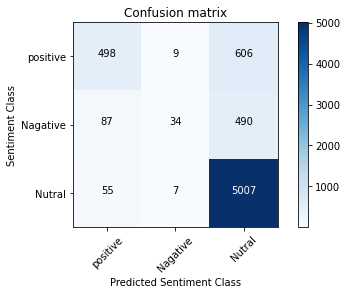

In [ ]:

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['positive', 'Nagative','Nutral'])

In [ ]:

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.815398204033564

In [ ]:
y_train.shape

(13789,)

In [ ]:
# Passive Aggressive Classifier Algorithm

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier


In [ ]:
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)


accuracy:   0.787
Confusion matrix, without normalization


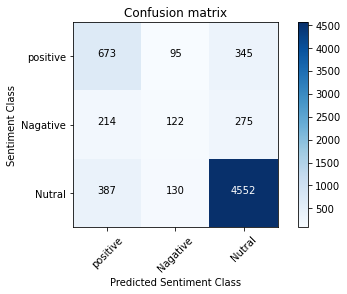

In [ ]:

linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['positive', 'Nagative','Nutral'])

In [ ]:
# Multinomial Classifier with Hyperparameter

In [ ]:

classifier=MultinomialNB(alpha=0.1)

In [ ]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8055351096717209
Alpha: 0.1, Score : 0.817606359487708
Alpha: 0.2, Score : 0.8211394082143383
Alpha: 0.30000000000000004, Score : 0.8227587222140439
Alpha: 0.4, Score : 0.8249668776681879
Alpha: 0.5, Score : 0.8255557191226263
Alpha: 0.6000000000000001, Score : 0.8249668776681879
Alpha: 0.7000000000000001, Score : 0.8215810393051671
Alpha: 0.8, Score : 0.8177535698513175
Alpha: 0.9, Score : 0.8173119387604887


In [ ]:
## Get Features names


ModuleNotFoundError: ignored

In [ ]:
feature_names = cv2.goodFeaturesToTrack()

TypeError: ignored